In [178]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [179]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [180]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [181]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [182]:
train.shape

(2154048, 19)

In [183]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [184]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [185]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [186]:
test.shape

(380127, 18)

In [187]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [188]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [189]:
submission.shape

(380127, 2)

In [190]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

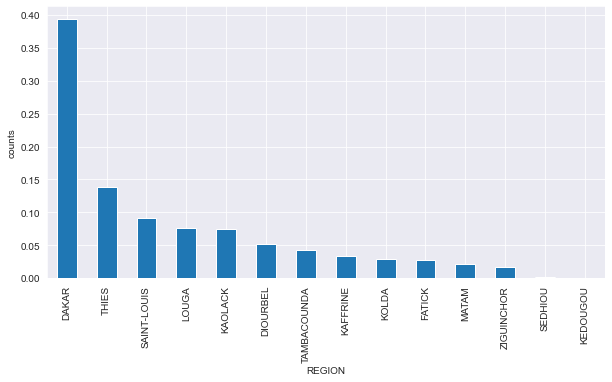

In [191]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

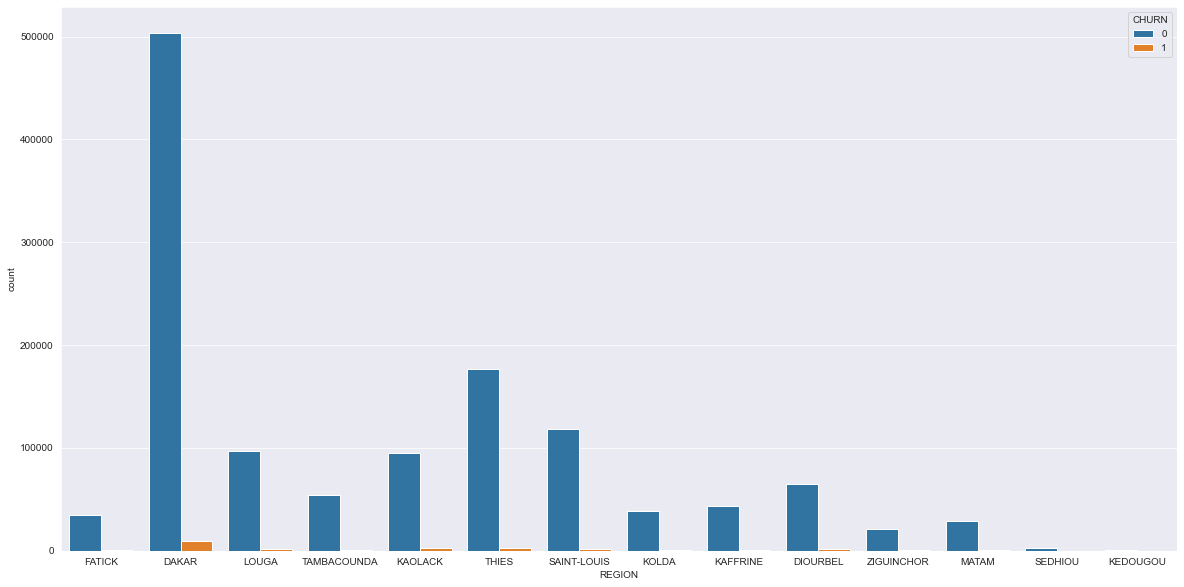

In [192]:
plt.figure(figsize=(20,10))
rc= sb.countplot(x='REGION', y=None, hue='CHURN', data=train, order=None, hue_order=None,
                  orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None)


K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

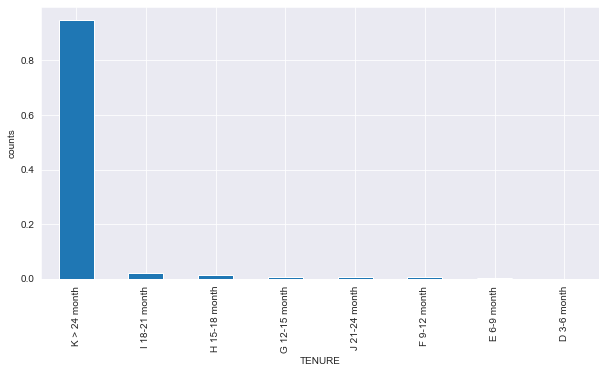

In [193]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

<AxesSubplot:xlabel='TENURE', ylabel='count'>

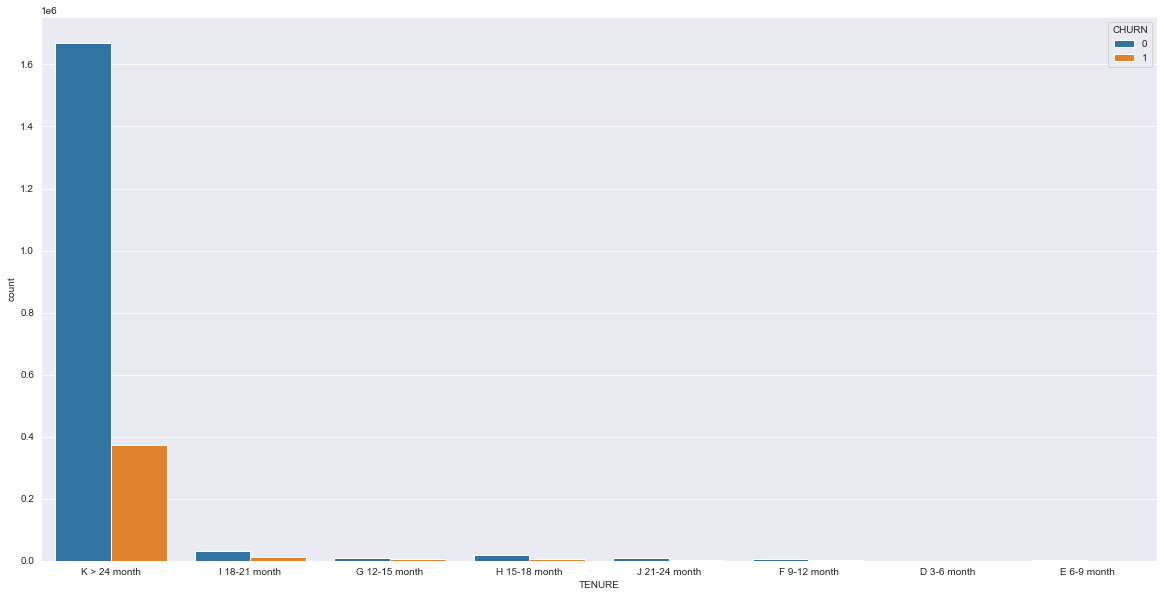

In [194]:
plt.figure(figsize=(20,10))
sb.countplot(x='TENURE', y=None, hue='CHURN', data=train, order=None, hue_order=None,
                  orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None)


NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

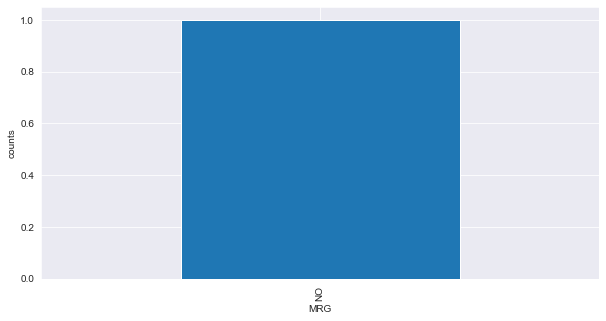

In [195]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

<AxesSubplot:xlabel='MRG', ylabel='count'>

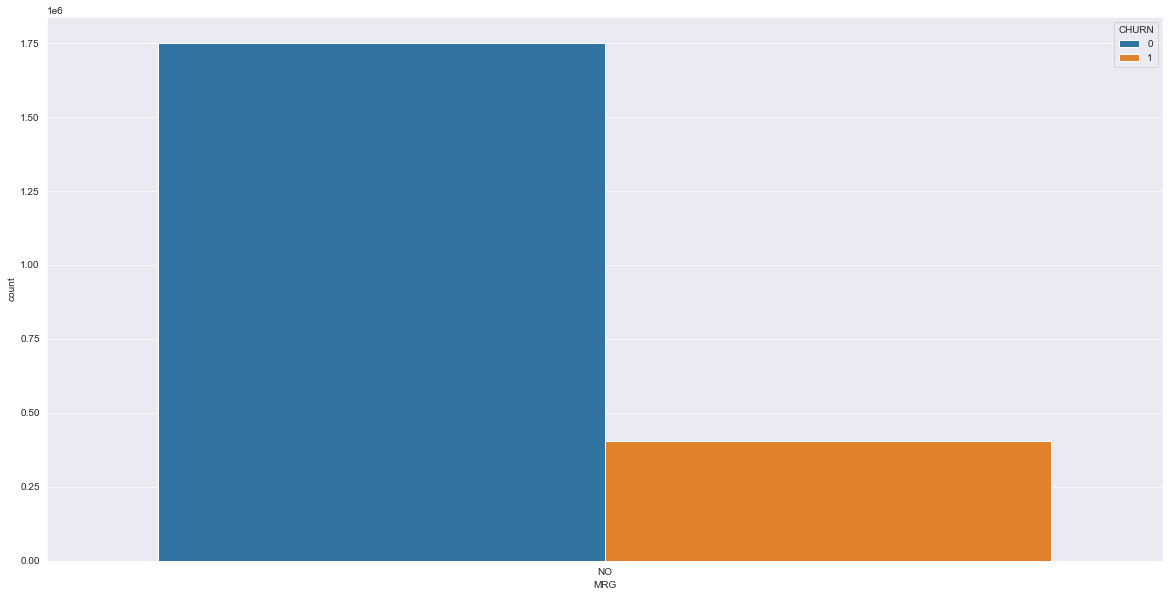

In [196]:
plt.figure(figsize=(20,10))
sb.countplot(x='MRG', y=None, hue='CHURN', data=train, order=None, hue_order=None,
                  orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None)


In [197]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(200,100))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

All-net 500F=2000F;5d                   317802
On net 200F=Unlimited _call24H          152295
Data:490F=1GB,7d                        115180
Data: 100 F=40MB,24H                     84649
Mixt 250F=Unlimited_call24H              67512
                                         ...  
GPRS_5Go_7D_PORTAL                           1
MegaChrono_3000F=12500F TOUS RESEAUX         1
Data_Mifi_10Go                               1
pilot_offer5                                 1
FIFA_TS_weekly                               1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

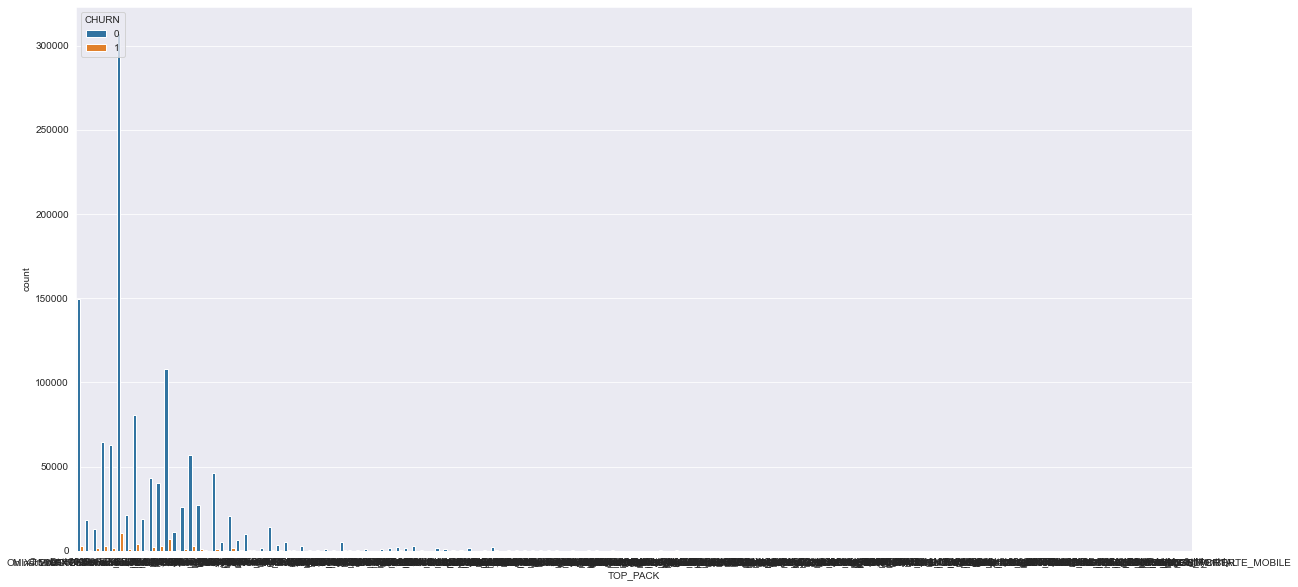

In [198]:
plt.figure(figsize=(20,10))
rc= sb.countplot(x='TOP_PACK', y=None, hue='CHURN', data=train, order=None, hue_order=None,
                  orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None)


0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

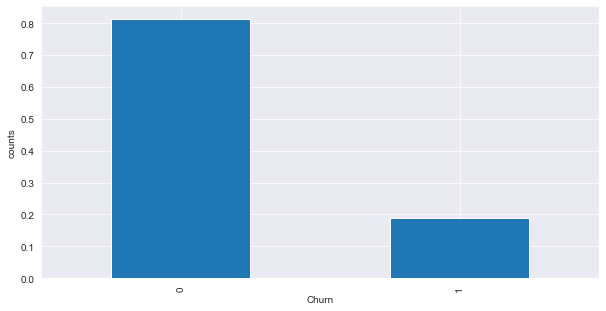

In [199]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [200]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [201]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [202]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) 

In [203]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [204]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [205]:
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.792672,0.976558,0.976558,0.775650,0.297847,0.326999,0.658372,0.412611,0.373342,0.424086,0.522593,0.741021,-0.105046
FREQUENCE_RECH,0.792672,1.000000,0.800284,0.800283,0.956127,0.150433,0.404998,0.518992,0.343009,0.119758,0.133633,0.557745,0.868200,-0.123439
REVENUE,0.976558,0.800284,1.000000,1.000000,0.785681,0.304058,0.332212,0.661119,0.412409,0.380280,0.375807,0.532103,0.750840,-0.114079
ARPU_SEGMENT,0.976558,0.800283,1.000000,1.000000,0.785680,0.304058,0.332212,0.661120,0.412409,0.380280,0.375807,0.532102,0.750840,-0.114079
FREQUENCE,0.775650,0.956127,0.785681,0.785680,1.000000,0.166603,0.395035,0.471881,0.306875,0.109893,0.146487,0.591324,0.844373,-0.139363
DATA_VOLUME,0.297847,0.150433,0.304058,0.304058,0.166603,1.000000,-0.013524,0.063176,0.022689,0.036299,0.049496,0.182708,0.116006,-0.032422
ON_NET,0.326999,0.404998,0.332212,0.332212,0.395035,-0.013524,1.000000,0.219622,0.136773,0.004499,-0.014901,0.270357,0.356503,-0.058698
ORANGE,0.658372,0.518992,0.661119,0.661120,0.471881,0.063176,0.219622,1.000000,0.403425,0.052715,0.034348,0.309016,0.553416,-0.063400
TIGO,0.412611,0.343009,0.412409,0.412409,0.306875,0.022689,0.136773,0.403425,1.000000,0.013807,0.020846,0.194156,0.368844,-0.035668
ZONE1,0.373342,0.119758,0.380280,0.380280,0.109893,0.036299,0.004499,0.052715,0.013807,1.000000,0.083372,0.045649,0.204093,0.009724


In [206]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0


In [207]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [208]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [209]:
#Fill NAs for train data

In [210]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [211]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,54,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,4,9.272461,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,8.170132,7.553309,17,1.000000,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,8.170132,7.553309,62,11.000000,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,8.170132,7.553309,11,2.000000,0


In [212]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [213]:
#Fill NAs for test data

In [214]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [215]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,8.164663,7.6553,42,5.000000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,8.164663,7.6553,41,1.000000
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,8.164663,7.6553,57,22.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,9,9.261584
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,10,9.261584


In [216]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [217]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification


In [218]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 14)
(2154048,)
(380127, 14)


In [219]:
#Split training data into train and test split

In [220]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 14)
(1507833,)
(646215, 14)
(646215,)


In [221]:
#Further split X_train and y_train into train and validation sets

In [222]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [223]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(1055483, 14)
(1055483,)
+++++++
test
(646215, 14)
(646215,)
+++++++
validation
(452350, 14)
(452350,)


In [224]:
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.792672,0.960419,0.960419,0.761874,0.231560,0.316632,0.626600,0.361729,0.173295,0.188689,0.367290,0.710508,-0.047253
FREQUENCE_RECH,0.792672,1.000000,0.786674,0.786673,0.938538,0.122825,0.390768,0.493382,0.294301,0.045679,0.049934,0.391996,0.838094,-0.055527
REVENUE,0.960419,0.786674,1.000000,1.000000,0.785681,0.239594,0.321036,0.629922,0.360794,0.177877,0.165762,0.381196,0.718528,-0.053808
ARPU_SEGMENT,0.960419,0.786673,1.000000,1.000000,0.785680,0.239594,0.321036,0.629922,0.360795,0.177878,0.165762,0.381195,0.718528,-0.053808
FREQUENCE,0.761874,0.938538,0.785681,0.785680,1.000000,0.136439,0.378461,0.446054,0.257109,0.041083,0.054102,0.423622,0.807265,-0.065734
DATA_VOLUME,0.231560,0.122825,0.239594,0.239594,0.136439,1.000000,-0.006394,0.030765,0.010078,0.007581,0.009554,0.117582,0.094580,-0.015398
ON_NET,0.316632,0.390768,0.321036,0.321036,0.378461,-0.006394,1.000000,0.215598,0.126377,0.001791,-0.004419,0.189208,0.346967,-0.026601
ORANGE,0.626600,0.493382,0.629922,0.629922,0.446054,0.030765,0.215598,1.000000,0.383429,0.024068,0.013434,0.200090,0.529566,-0.024461
TIGO,0.361729,0.294301,0.360794,0.360795,0.257109,0.010078,0.126377,0.383429,1.000000,0.005594,0.006817,0.097143,0.327357,-0.009996
ZONE1,0.173295,0.045679,0.177877,0.177878,0.041083,0.007581,0.001791,0.024068,0.005594,1.000000,0.021809,0.010343,0.082682,0.001447


In [225]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [226]:
scaler = StandardScaler()

In [227]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [228]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
373727,K > 24 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-1.168331,-0.000519
1269513,K > 24 month,-0.000135,-0.000351,-0.907394,-0.907569,-0.917482,-0.068522,-0.396466,-0.601043,0.000404,-0.00001,0.000473,-0.674862,-0.000519
776124,K > 24 month,-0.792423,-0.891055,-0.770612,-0.770787,-1.001065,-0.348595,-0.347768,-0.397514,-0.505148,-0.00001,0.000473,0.042910,-0.781057
1077753,K > 24 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-0.405698,-0.000519
1365295,K > 24 month,1.593820,3.315176,1.680182,1.680011,3.428837,-0.033707,4.543528,0.403880,2.210002,-0.00001,0.000473,1.074708,3.404735


In [229]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [230]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
417912,K > 24 month,5.500967,0.884909,5.564362,5.564198,1.004929,-0.161397,1.497031,6.795954,3.894400,-0.00001,0.000473,1.523316,2.546111
1380278,K > 24 month,-0.355382,-0.423696,-0.343704,-0.343537,-0.583149,-0.000911,-0.354929,-0.034978,-0.404587,-0.00001,0.000473,-0.226254,-0.244417
657158,K > 24 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-0.181394,-0.000519
228934,I 18-21 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-1.213192,-0.000519
2020145,K > 24 month,2.196937,0.417550,2.149439,2.149269,0.252681,-0.000911,0.119161,0.632850,-0.505148,-0.00001,0.000473,1.119569,0.828863


In [231]:
test[num_cols] = scaler.transform(test[num_cols])

In [232]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.093158,-0.610640,-0.087559,-0.087392,-0.750316,-0.003014,0.143510,-0.537440,-0.454868,-0.000509,0.012663,0.626101,-0.459073
1,I 18-21 month,-0.914795,-0.891055,-0.885707,-0.885540,-0.917482,-0.307684,0.001435,-0.607403,-0.001033,-0.000509,0.012663,0.581240,-0.888385
2,K > 24 month,-0.390346,1.258796,-0.360780,-0.360955,1.004929,0.389966,-0.397898,-0.594682,-0.454868,-0.000509,0.012663,1.299012,1.365503
3,K > 24 month,-0.001386,-0.001218,-0.002232,-0.002232,-0.001582,-0.003014,0.001435,-0.001949,-0.001033,-0.000509,0.012663,-0.854305,-0.001686
4,K > 24 month,-0.001386,-0.001218,-0.002232,-0.002232,-0.001582,-0.003014,0.001435,-0.001949,-0.001033,-0.000509,0.012663,-0.809445,-0.001686


In [233]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [234]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
1095611,K > 24 month,-0.932276,-0.984527,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.000010,0.000473,-1.078609,-0.000519
168212,K > 24 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.000010,0.000473,-1.213192,-0.000519
1571665,K > 24 month,-0.390346,-0.610640,-0.403642,-0.403475,-0.750316,0.889469,-0.000165,-0.588322,0.000404,-0.000010,0.000473,1.074708,-0.781057
1960421,K > 24 month,-0.792423,-0.891055,-0.770612,-0.770787,-0.917482,-0.000911,-0.380711,-0.543800,0.000404,-0.654224,0.000473,1.074708,-0.888385
127125,K > 24 month,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.392169,-0.000514,0.000404,-0.654224,0.000473,-0.226254,-0.000519


In [235]:
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.792672,0.960419,0.960419,0.761874,0.231560,0.316632,0.626600,0.361729,0.173295,0.188689,0.367290,0.710508,-0.047253
FREQUENCE_RECH,0.792672,1.000000,0.786674,0.786673,0.938538,0.122825,0.390768,0.493382,0.294301,0.045679,0.049934,0.391996,0.838094,-0.055527
REVENUE,0.960419,0.786674,1.000000,1.000000,0.785681,0.239594,0.321036,0.629922,0.360794,0.177877,0.165762,0.381196,0.718528,-0.053808
ARPU_SEGMENT,0.960419,0.786673,1.000000,1.000000,0.785680,0.239594,0.321036,0.629922,0.360795,0.177878,0.165762,0.381195,0.718528,-0.053808
FREQUENCE,0.761874,0.938538,0.785681,0.785680,1.000000,0.136439,0.378461,0.446054,0.257109,0.041083,0.054102,0.423622,0.807265,-0.065734
DATA_VOLUME,0.231560,0.122825,0.239594,0.239594,0.136439,1.000000,-0.006394,0.030765,0.010078,0.007581,0.009554,0.117582,0.094580,-0.015398
ON_NET,0.316632,0.390768,0.321036,0.321036,0.378461,-0.006394,1.000000,0.215598,0.126377,0.001791,-0.004419,0.189208,0.346967,-0.026601
ORANGE,0.626600,0.493382,0.629922,0.629922,0.446054,0.030765,0.215598,1.000000,0.383429,0.024068,0.013434,0.200090,0.529566,-0.024461
TIGO,0.361729,0.294301,0.360794,0.360795,0.257109,0.010078,0.126377,0.383429,1.000000,0.005594,0.006817,0.097143,0.327357,-0.009996
ZONE1,0.173295,0.045679,0.177877,0.177878,0.041083,0.007581,0.001791,0.024068,0.005594,1.000000,0.021809,0.010343,0.082682,0.001447


In [236]:
#Encode the TENURE column

In [237]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [238]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [239]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [240]:
test['TENURE'] = encoder.transform(test["TENURE"])

In [241]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
373727,7,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-1.168331,-0.000519
1269513,7,-0.000135,-0.000351,-0.907394,-0.907569,-0.917482,-0.068522,-0.396466,-0.601043,0.000404,-0.00001,0.000473,-0.674862,-0.000519
776124,7,-0.792423,-0.891055,-0.770612,-0.770787,-1.001065,-0.348595,-0.347768,-0.397514,-0.505148,-0.00001,0.000473,0.042910,-0.781057
1077753,7,-0.000135,-0.000351,-0.000332,-0.000332,0.000105,-0.000911,-0.000165,-0.000514,0.000404,-0.00001,0.000473,-0.405698,-0.000519
1365295,7,1.593820,3.315176,1.680182,1.680011,3.428837,-0.033707,4.543528,0.403880,2.210002,-0.00001,0.000473,1.074708,3.404735


In [242]:
##RandomForestClassifier Model

In [243]:
X, Y = make_classification(n_samples=1000, n_classes=2, random_state=1)
logreg = LogisticRegression()   
model=logreg.fit(X_train, y_train)  
predicted  = logreg.predict(X_test)


In [244]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.893


In [245]:
print("Acuracy")
accuracy_score(y_test, predicted)

Acuracy


0.8574499199182934

In [246]:
print("Recall")
recall_score(y_test, predicted)

Recall


0.5957082468171703

In [247]:
print("F1 Score")
f1_score(y_test, predicted)

F1 Score


0.6099009062420597

In [248]:
confusion_matrix(y_test, predicted)

array([[482086,  43246],
       [ 48872,  72011]], dtype=int64)

In [249]:
# Making a submissio

In [250]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [251]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,7,-0.093158,-0.610640,-0.087559,-0.087392,-0.750316,-0.003014,0.143510,-0.537440,-0.454868,-0.000509,0.012663,0.626101,-0.459073
1,5,-0.914795,-0.891055,-0.885707,-0.885540,-0.917482,-0.307684,0.001435,-0.607403,-0.001033,-0.000509,0.012663,0.581240,-0.888385
2,7,-0.390346,1.258796,-0.360780,-0.360955,1.004929,0.389966,-0.397898,-0.594682,-0.454868,-0.000509,0.012663,1.299012,1.365503
3,7,-0.001386,-0.001218,-0.002232,-0.002232,-0.001582,-0.003014,0.001435,-0.001949,-0.001033,-0.000509,0.012663,-0.854305,-0.001686
4,7,-0.001386,-0.001218,-0.002232,-0.002232,-0.001582,-0.003014,0.001435,-0.001949,-0.001033,-0.000509,0.012663,-0.809445,-0.001686
